In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bicker.emulator as BICKER
import time

path_to_repo = "/Users/jamie/Desktop/GitHubProjects/BICKER/"

Start by loading the ids corresponding to unseen data.

In [2]:
test_ids = np.load(f"{path_to_repo}bicker-cache/powerspec/split/test.npy")

Next load the cosmology for each id.

In [3]:
cosmos = np.load(f"{path_to_repo}data/cosmologies/eft_cosmologies_noDQ1.npy")[test_ids]

Next load the kernel for each id.

In [4]:
kernels = []
for i in test_ids:
    kernels.append(np.loadtxt(f"{path_to_repo}data/powerspec/kernels/pk_kernels_{i}.txt"))
kernels = np.stack(kernels)

Initalise the emulator for the monopole.

In [5]:
emu = BICKER.power(0)

2022-09-09 12:10:17.132322: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Make for the monopole specific kernels for the entire test set. This cell looks a mess but this is not the expected way to use the emulator. Using the `.emu_predict` method is much cleaner. We make predictions in this way because we want to have predictions for the bias independent kernels.

In [6]:
start = time.time()
preds = emu.models[0].predict(emu.scalers[0][0].transform(cosmos))
preds = emu.scalers[0][1].inverse_transform(preds).reshape(test_ids.shape[0], int(preds.shape[1]/emu.kbins.shape[0]), emu.kbins.shape[0])
print(f"{test_ids.shape[0]} predictions in {time.time()-start} seconds!")

2000 predictions in 0.48940110206604004 seconds!


2022-09-09 12:10:17.841546: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Next we loop over all the kernels and compare the prediction from the emulator to the truth for a single cosmlogy as well as plotting the ratio of the emulator prediction to the truth for all samples in the test set.

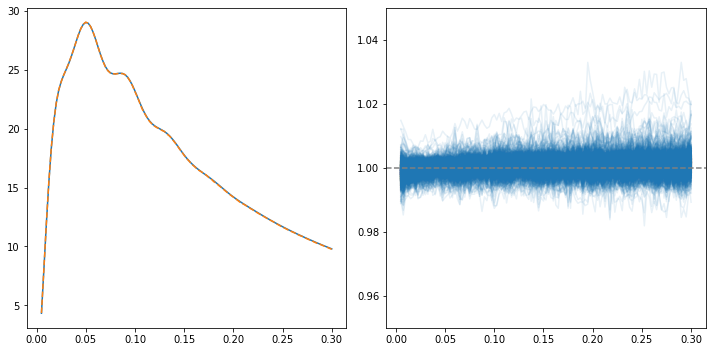

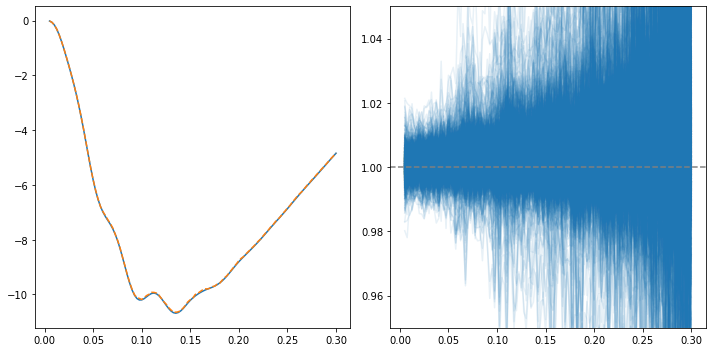

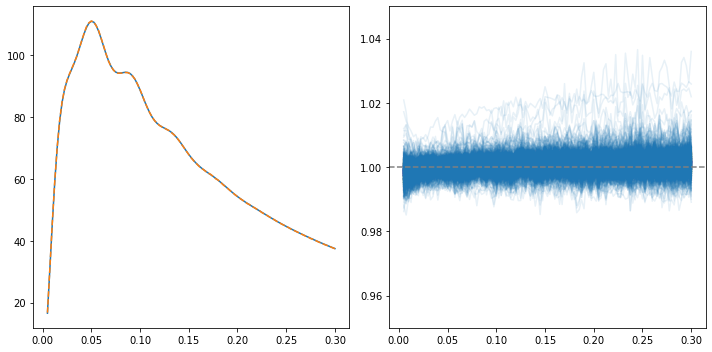

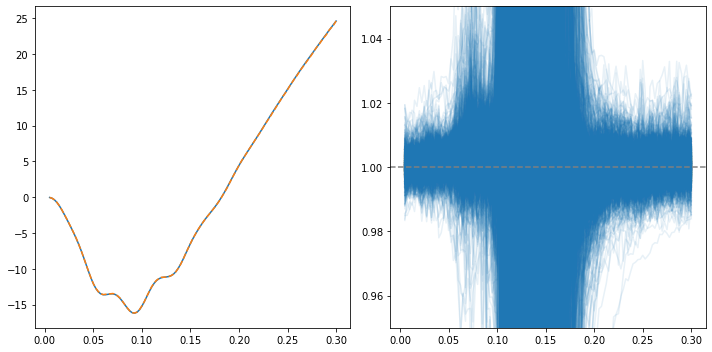

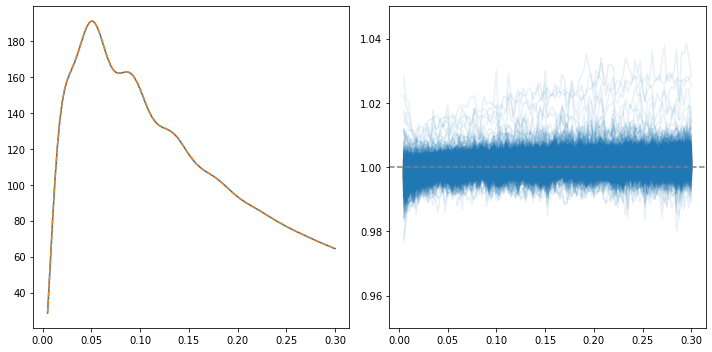

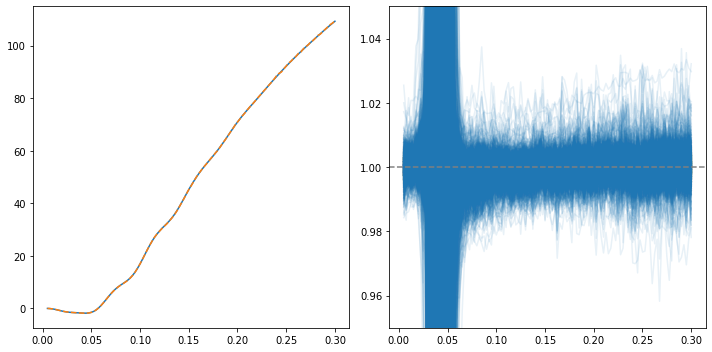

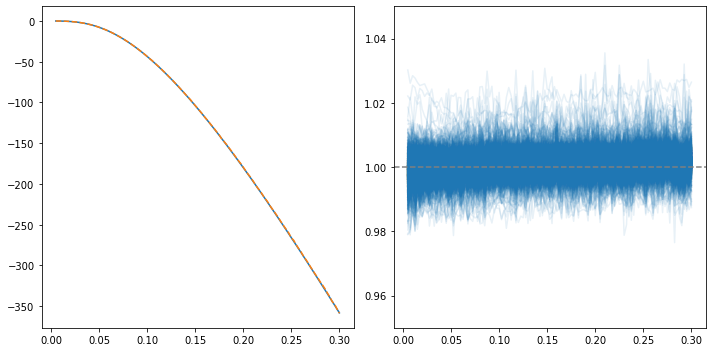

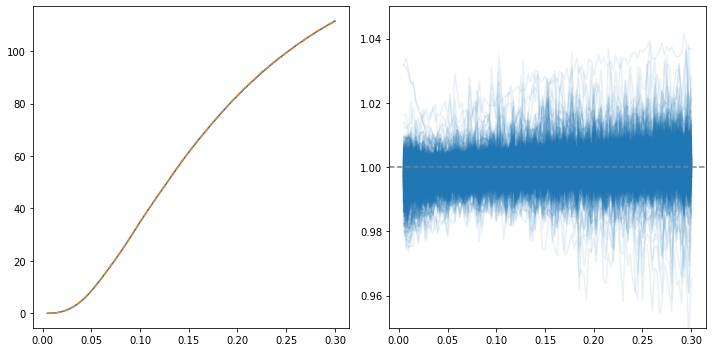

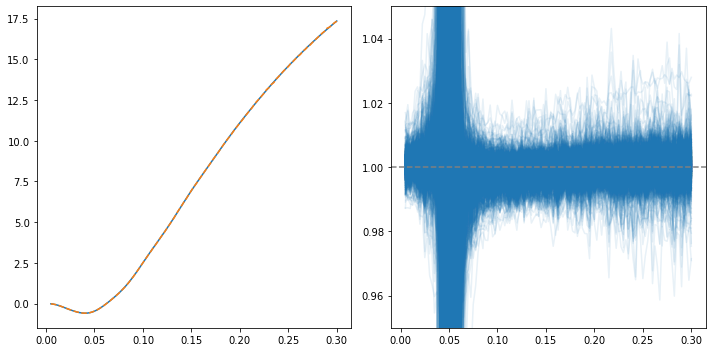

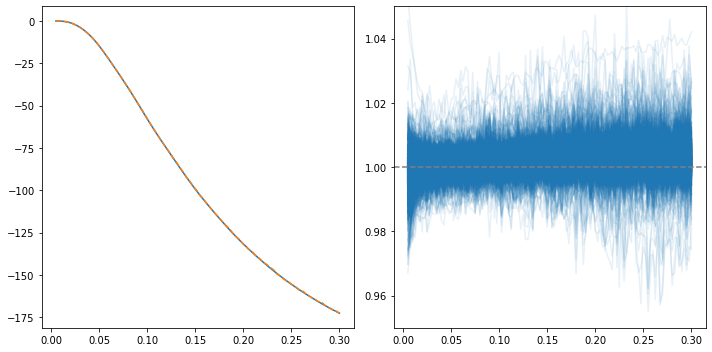

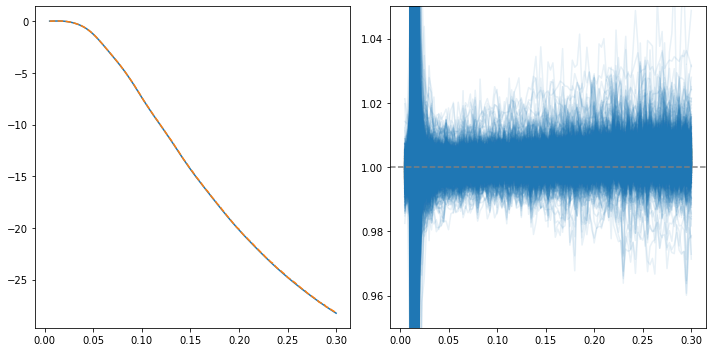

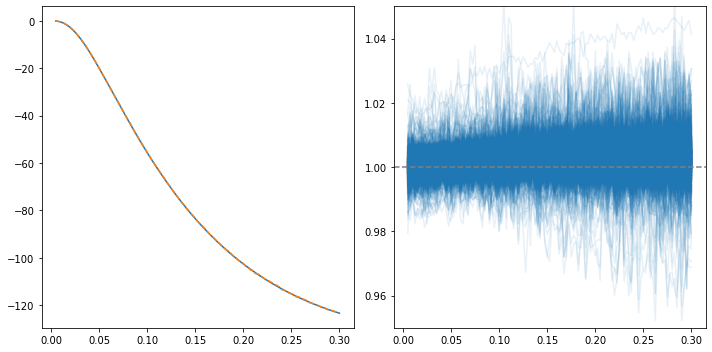

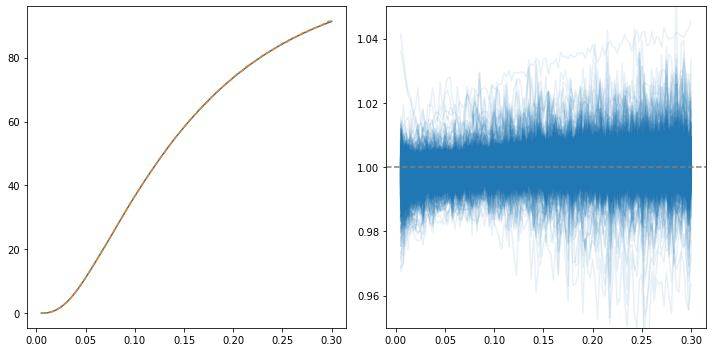

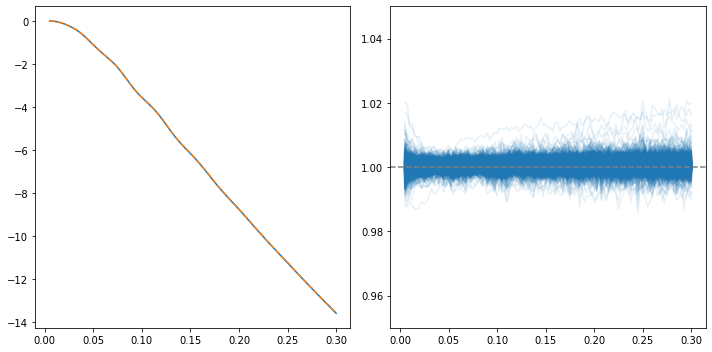

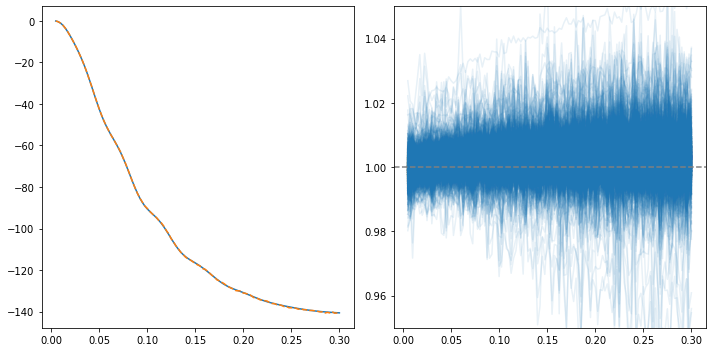

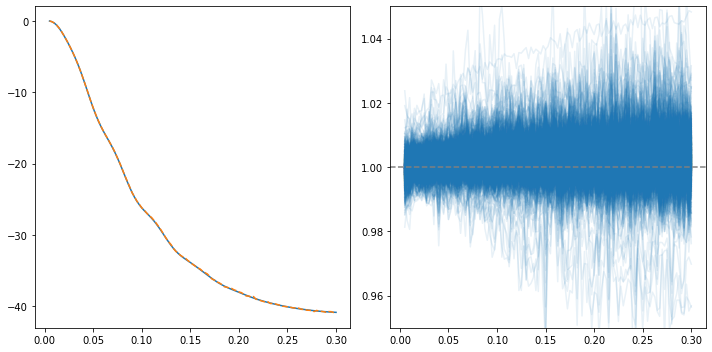

In [7]:
for i in range(16):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    
    ax[0].plot(emu.kbins, emu.kbins*kernels[0,i,:])
    ax[0].plot(emu.kbins, emu.kbins*preds[0,i,:], linestyle='--')
    
    ax[1].plot(emu.kbins, (kernels[:,i,:]/preds[:,i,:]).T, alpha=0.1, color='tab:blue')
    ax[1].axhline(1., linestyle='--', color='grey')
    ax[1].set_ylim(0.95, 1.05)
    
    plt.tight_layout()
    plt.show()

Finally we make a prediction for the galaxy monopole with $b_1=1.$ and all other bias parameters equal to zero.

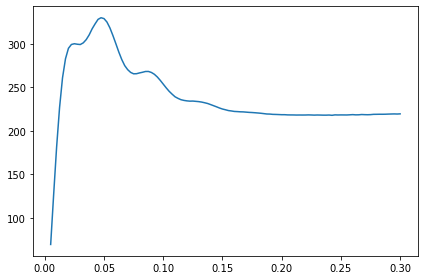

In [8]:
plt.plot(emu.kbins, emu.kbins*emu.emu_predict(cosmos[200], np.array([1.,0.,0.,0.,0.,0.,0.]))[0])
plt.tight_layout()
plt.show()